# <center><font color=#46769B>Lesson 2: Normal distributions</font></center>

#### <center><font color=#46769B>Author: Sean Tulin</font></center>

*Normal* or *Gaussian distributions* are an important type of PDF and are ubiquitous not only in Monte Carlo sampling, but throughout statistics and the physical sciences.
They also play a key role in the theoretical foundation of Monte Carlo sampling (and in statistics in general)

Our goals for this lesson are:
- Introduce __normal__ or __Gaussian distributions__.
- Learn how to sample from normal probability distribution functions (PDFs).
- Discuss and quantify a commonly-used phrase __sigma__ as a relative departure from the mean
- Discuss the __Law of Large Numbers__ and the __Central Limit Theorem__, two mathematical theorems that underpin statistics and Monte Carlo sampling.


## <font color=#46769B>Univariate normal distributions</font>

A normal distribution of one variable is described by the function

$$\mathcal{N}(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{- \frac{(x-\mu)^2}{2\sigma^2}} \, ,$$

where $x$ is a continuous variable. Appropriately, the parameters $\mu$ and $\sigma$ that appear here are the mean and standard deviation of this distribution. (We will prove this in a moment.) 
We will use $\mathcal{N}(x)$ instead of $P(x)$ to denote a normal PDF, and sometimes we will write $\mathcal{N}(\mu,\sigma)$ to denote *a normal distribution centered at $\mu$ with standard deviation $\sigma$*.

The shape of $\mathcal{N}$ is the familiar bell curve. Let's plot it. If you like, you can change $\mu,\sigma$ to see what effect this has on the shape.

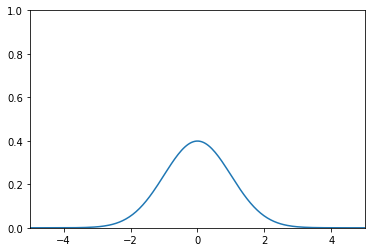

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 1

x = np.linspace(-5,5,num=200)
N = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)

plt.plot(x,N)
plt.xlim([-5,5])
plt.ylim([0,1])
plt.show()

### <font color=#46769B>Gaussian integrals</font>

We will now prove three facts about $\mathcal{N}(x)$:
- That our Gaussian function is normalized to unity:
$$\int_{-\infty}^{\infty} dx \, \mathcal{N}(x) = 1 \qquad {\rm (1)} $$ 
- That the mean of our Gaussian function is $\mu$:
$$\int_{-\infty}^{\infty} dx \, x \, \mathcal{N}(x) = \mu \qquad {\rm (2)} $$
- That the variance of of our Gaussian function is $\sigma^2$:
$$\int_{-\infty}^{\infty} dx \, (x-\mu)^2 \, \mathcal{N}(x) = \sigma^2  \qquad {\rm (3)} $$
and so that the standard deviation is $\sigma$.

All three boil down to being able to perform various integrals of a Gaussian. This involves some mathematical ninja skills that you may not have seen before.

#### <font color=#46769B>The basic integral</font>

Let's calculate the integral $I = \int_{-\infty}^{\infty} dx \, e^{-x^2/2}$. The trick is to calculate $I^2$:
$$I^2 = \left( \int_{-\infty}^{\infty} dx \, e^{-x^2/2} \right) \times \left( \int_{-\infty}^{\infty} dy \, e^{-y^2/2} \right)$$
where in the second term the integration variable is labeled $y$ so we don't get confused with the first integration variable $x$. We can group the integrations together as
$$I^2 = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, e^{-\frac{x^2 + y^2}{2}}\, .$$
Now it looks like we are doing an integral over the 2D $x$-$y$ plane in Cartesian coordinates. Let's change to polar coordinates: $x = r \cos\theta$ and $y=r \sin\theta$, where $r = \sqrt{x^2 + y^2}$. We need to recall that the area element is
$$dx \, dy = r \, dr \, d\theta\, .$$
Now we have
$$I^2 = \int_0^\infty r \, dr \int_0^{2\pi} d\theta \, e^{-r^2/2} 
= 2\pi \, ,$$
where the $\theta$ integral gives (trivially) $\int_0^{2\pi} d\theta = 2\pi$ and the $r$ can be done with a substitution $u = \frac{1}{2}r^2$, which yields $\int_0^\infty dr \, r\, e^{-r^2/2} = \int_0^\infty du \, e^{-u} = 1$. Our final result is $I = \sqrt{2\pi}$.

#### <font color=#46769B>The general integral</font>

Let's calculate the integral $\int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}$. If we define a new variable $u = (x-\mu)/\sigma$, then $dx = \sigma \, du$. The integral we want to calculate is now
$$\int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \sigma \int_{-\infty}^{\infty} du \, e^{-\frac{u^2}{2}} = \sigma \sqrt{2\pi}\, ,$$
recognizing the integral $I$ as we had above (now an integral over $u$ instead of $x$).
Dividing by both sides by $\sqrt{2\pi\sigma^2}$ allows us to prove assertion (1).

Without much extra work, we can prove assertion (2). With the same $u$-substitution, we have
$$\int_{-\infty}^{\infty} dx \, x \, e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \sigma \int_{-\infty}^{\infty} du \, (\mu + u \sigma) \, e^{-\frac{u^2}{2}} = \sigma \mu \int_{-\infty}^{\infty} du \, e^{-\frac{u^2}{2}} + \sigma^2 \int_{-\infty}^{\infty} du \, u \, e^{-\frac{u^2}{2}} = \sigma \mu \sqrt{2\pi}$$
The second integral vanishes since $u \, e^{-u^2/2}$ is an odd function integrated over an even domain, while the first term is just $I$. Dividing both sides by $\sqrt{2\pi \sigma^2}$ completes the proof.

#### <font color=#46769B>Differentiating under the integral</font>

Proving assertion (3) requires a new trick. We already proved the following result:
$$\int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}  = \sqrt{2\pi} \sigma \, .$$
Now, we take the derivative of both sides *with respect to $\sigma$*, which is a trick known as differentiating under the integral:
$$\frac{d}{d \sigma} \left( \int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}  \right) = \frac{d}{d \sigma} \left( \sqrt{2\pi} \sigma \right) \, .$$
This yields
$$\int_{-\infty}^{\infty} dx \, \frac{(x-\mu)^2}{\sigma^3} \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}   =  \sqrt{2\pi} \, .$$
Multiplying through by $\sigma^2/\sqrt{2\pi}$ allows us to prove assertion (3).



### <font color=#46769B>Random sampling from a normal distribution</font>

It is easy to take samples from a normal distribution using `numpy`'s built-in random number generator. The syntax
```py
x = numpy.random.normal(mu,sigma,num)
```
will create a `numpy.array` named `x` of length `num` with randomly-generated entries sampled from $\mathcal{N}(\mu,\sigma)$. You can read more [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Let's see how this works. Below, you can explore how different inputs affect your results:
- Change the inputs `mu` and `sigma` to vary the location and width of the distribution
- Increase the size of your sample. Typically this should be *much* larger than the value `num=100` I chose.
- Increase the number of bins in the histgram from the value I chose, `bins=10`.

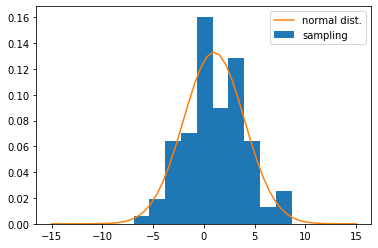

The mean of our samples is 1.1355615051317567
The standard deviation of our samples is 2.97801267047678


In [2]:
# Define our parameters
mu = 1
sigma = 3
num = 100

# Draw our samples
x = np.random.normal(mu,sigma,num)

# Compute mean and std dev
mean = np.mean(x)
stddev = np.std(x)

# Plot a histogram
plt.hist(x,bins=10,density=True,label='sampling')

# Now let's compare to our Gaussian PDF
x = np.linspace(-15,15)
y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)
plt.plot(x,y,label='normal dist.')

plt.legend()
plt.show()

print('The mean of our samples is', mean)
print('The standard deviation of our samples is', stddev)



## <font color=#46769B>Sigmas</font>

In our previous discussion, we noted that the standard deviation $\sigma$ provides a measure of how spread out our samples are. That is, if we draw one sample from a PDF $P(x)$, we are likely to get a value for $x$ that is within one standard deviation from the mean $\mu$.
This range is called the "one-sigma" range:

$$\mu - \sigma \le x \le \mu + \sigma \, .$$

We can also talk about ranges defined by two sigmas, three sigmas, and so on. We are *very* likely to get a value for $x$ within the two-sigma range

$$\mu - 2\sigma \le x \le \mu + 2\sigma \, .$$

We are *very very* likely to get a value within the three-sigma range

$$\mu - 3\sigma \le x \le \mu + 3\sigma \, .$$

How likely is "likely"? Let's quantify this more precisely. 

### <font color=#46769B>Example 1: One-sigma range for a normal distribution</font>

Given a PDF $\mathcal{N}(\mu,\sigma)$, how likely is $x$ to be within one standard deviation of the mean? 

Below is a code that calculates this fraction, which is approximately 68\%. You can verify that it doesn't depend on our choices for $\mu$ and $\sigma$ in the limit that $N$ is sufficiently large.

In [3]:
# Define our parameters
mu = 0
sigma = 1
num = 100000

# Generate samples
x = np.random.normal(mu,sigma,num)

# Count values of x within one sigma of mean
count = 0
for i in range(num):
    if (x[i] >= mu - sigma) & (x[i] <= mu + sigma):
        count += 1
    
print('One-sigma range includes a fraction', count/num, 'of the samples.')

One-sigma range includes a fraction 0.68206 of the samples.


### <font color=#46769B>Example 2: One-sigma range for a uniform distribution</font>

The fraction of samples within one standard deviation of the mean it is not the same for *all* PDFs. For example, we can repeat this exercise for a uniform distribution.

First, let us calculate the mean and standard deviation analytically. After some integrals and algebra, we get

$$\mu = \int_a^b dx \; x \, P(x) = \frac{1}{b-a} \int_a^b dx \; x  = \frac{a+b}{2} $$

$$\sigma^2 = \left( \int_a^b dx \; x^2 \, P(x) \right) - \mu^2  
= \left( \frac{1}{b-a} \int_a^b dx \; x^2 \right) - \frac{(a+b)^2}{4} 
= \frac{(b-a)^2}{12} \, .$$

So, the standard deviation is $\sigma = (b-a)/\sqrt{12}$.

It turns out that the fraction of samples within a one-sigma range of the mean is about 58\%, as the following code demonstrates. (You can check that your answer does not depend on $a$, $b$.)


In [4]:
# Define our parameters
a = 1
b = 4
num = 100000

mu = (a + b)/2
sigma = (b - a) / np.sqrt(12)

# Generate samples
x = np.random.uniform(a,b,num)

# Count values of x within one sigma of mean
count = 0
for i in range(num):
    if (x[i] >= mu - sigma) & (x[i] <= mu + sigma):
        count += 1
    
print('One-sigma range includes a fraction', count/num, 'of the samples.')

One-sigma range includes a fraction 0.57539 of the samples.


## <font color=#46769B>Mathematical theorems</font>

There are two mathematical theorems that underpin this subject. We do not attempt to prove them.
- __Law of Large Numbers (LLN):__ The mean value of our samples approaches the true mean value of the distribution in the limit that $N$, the number of samples, becomes large. For example, if we flip the coin $N$ times, the *mean value of our samples* $\langle x\rangle$ approaches the *true* mean $\mu=p$ in the limit that $N$ goes to infinity. 

Actually, the LLN applies to *any* mean we want to compute, not just the mean of $x$. For example, if we calculate $\langle x^2 \rangle$ from our samples, it approaches the *true* value of the mean of $x^2$, which we would write as $\sum_x P(x)\, x^2$.
Since the variance depends on the mean values of $x$ and $x^2$, the LLN implies that the variance of our samples, $\Delta x^2$, must approach the *true* variance $\sigma^2$ in this limit.

In practice, however, our computers cannot run forever and we must take a finite value for $N$. 
If we perform a simulation with $N$ samples, how close should our result for $\langle x \rangle$ be to $\mu$?

- __The Central Limit Theorem (CLT):__ Suppose we generate samples for $x$ from some PDF $P(x)$, which has mean $\mu$ and standard deviation $\sigma$. The mean value $\langle x \rangle$ is itself a sample from a *normal distribution* with mean $\mu$ and standard deviation $\sigma/\sqrt{N}$.

For a normal distribution, the likelihood to be within one standard deviation from the mean is about 68\%. So, the CLT says that the value of $\langle x \rangle$ from our simulation is *probably* (about 68\% of the time) within the range 
$$\mu - \frac{\sigma}{\sqrt{N}} < \langle x \rangle < \mu + \frac{\sigma}{\sqrt{N}} \, .$$

As $N$ grows larger, $\sigma/\sqrt{N}$ will become smaller, and we are more likely to obtain a value of $\langle x \rangle$ closer to the true mean $\mu$.

For example, suppose we perform several simulations, each one with $N = 100$ (fair) coin flips. For *each* simulation, we calculate $\langle x \rangle$, e.g., 

$${\rm simulation \; 1:} \quad \langle x \rangle = 0.48$$
$${\rm simulation \; 2:} \quad \langle x \rangle = 0.52$$
$${\rm simulation \; 3:} \quad \langle x \rangle = 0.44$$
$${\rm simulation \; 4:} \quad \langle x \rangle = 0.53$$
$$\vdots$$

and so forth. Since each simulation has its own randomly sampled $x$ values, we get a slightly different value for $\langle x \rangle$ each time. The CLT tells us that these different values for $\langle x \rangle$ will be distributed around the true mean ($\mu=0.5$) as a normal distribution with width $\sigma/\sqrt{N} = 0.5/\sqrt{100} = 0.05$. In other words, our simulations will *probably* (about 68\% of the time) yield $\langle x \rangle$ within one standard deviation of the true mean, in the range $0.45 \le \langle x \rangle \le 0.55$.

Now suppose we perform several new simulations, each one with $N = 10^4$ (fair) coin flips, yielding values  

$${\rm simulation \; 1:} \quad \langle x \rangle = 0.4944$$
$${\rm simulation \; 2:} \quad \langle x \rangle = 0.5038$$
$${\rm simulation \; 3:} \quad \langle x \rangle = 0.4903$$
$${\rm simulation \; 4:} \quad \langle x \rangle = 0.5040$$
$$\vdots$$

and so forth. The CLT tells us these values will be distributed about $\mu=0.5$ with width $\sigma/\sqrt{N} = 0.5/\sqrt{10000} = 0.005$. *Probably* (about 68\% of the time), we will find $\langle x \rangle$ in the range $0.495 \le \langle x \rangle \le 0.505$.


Finally, note that $\sigma/\sqrt{N}$ is simply the standard error of the mean. If $\sigma$ is not known, it can be approximated from our samples as $E_x = \Delta x/\sqrt{N}$.

### <font color=#46769B>Example 3: Flipping a coin revisited</font>

Suppose we flip a coin $N$ times, with probability $p$ for heads and probability $1-p$ for tails. We calculate $\langle x \rangle$. The Law of Large Numbers and Central Limit Theorem tells us that we expect $\langle x \rangle$ to likely be within the range

$$p - \frac{\sqrt{p(1-p)}}{\sqrt{N}} \le \langle x \rangle \le p + \frac{\sqrt{p(1-p)}}{\sqrt{N}}$$

- Perform 500 Monte Carlo simulations, each with $N=100$ coin flips, and calculate the mean $\langle x \rangle$ for each simulation. Plot the list of 500 means calculated.

- Repeat the 500 Monte Carlo simulations, now with $N=1000$ coin flips. Calculate and plot a new list of means $\langle x \rangle$.

We find that for larger $N$, the mean values $\langle x \rangle$ are more likely to be closer to the true mean $p=0.6$.


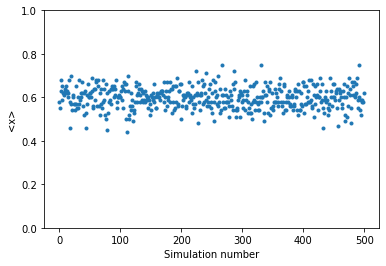

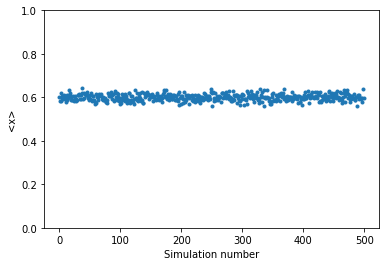

In [5]:
# Define a function that will flip a coin N times and calculate the mean <x>
def coin_flip_simulation(num):
    
    # Define parameters
    p = 0.6
    options = [1,0]
    prob = [p,1-p]
    
    # Generate samples
    x = np.random.choice(options,num,p=prob)
    
    # Calculate <x>
    mean = np.mean(x)
    
    return mean

# Let's perform 500 simulations, each with N=100
num = 100

list_of_means = []
for i in range(500):
    list_of_means.append(coin_flip_simulation(num))
    
plt.plot(list_of_means,'.',label='N=100')

plt.xlabel('Simulation number')
plt.ylabel('<x>')
plt.ylim([0,1])
plt.show()

# Let's perform 500 simulations, each with N=100
num = 1000

list_of_means = []
for i in range(500):
    list_of_means.append(coin_flip_simulation(num))
    
plt.plot(list_of_means,'.',label='N=1000')

plt.xlabel('Simulation number')
plt.ylabel('<x>')
plt.ylim([0,1])
plt.show()